<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/Experiment_7/Experiment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Roll Number = 191EE123 <br> a = 1 + mod(123,3) = 1

In [2]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
from scipy.signal import chirp, spectrogram
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks



a = 1
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})
!pip install control

import control

     |████████████████████████████████| 339 kB 2.7 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=75fb89c44628ea0d9c8afcb914ed3b8eae11bf63083e85febee41be715fcb6a4
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


# **Problem** **1**. <br>
Part 1: <br>

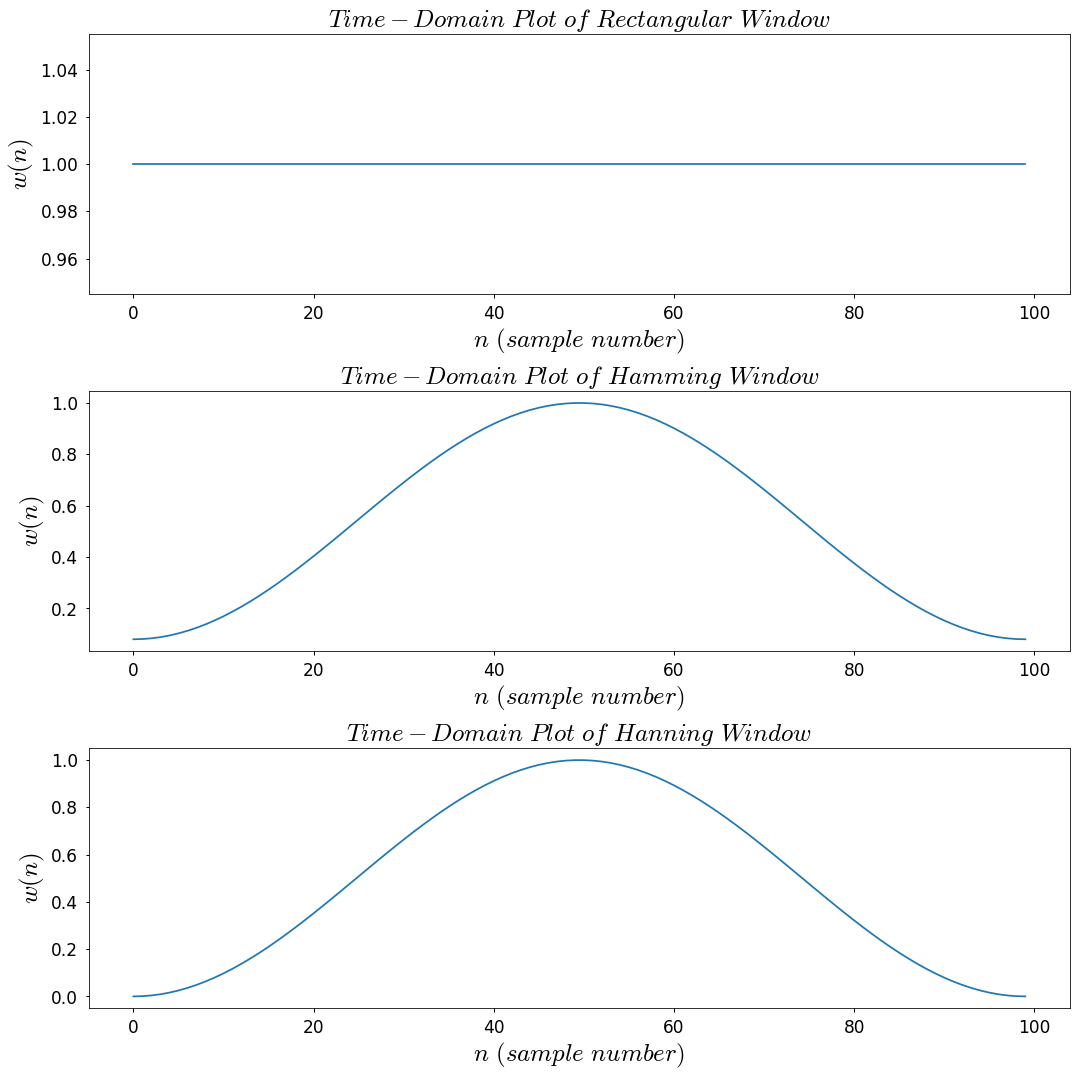

In [62]:
n=np.arange(0, 100)
t1= ['$Time-Domain\ Plot\ of\ Rectangular\ Window$',
          '$Time-Domain\ Plot\ of\ Hamming\ Window$',
          '$Time-Domain\ Plot\ of\ Hanning\ Window$']
fig1, axs1 = plt.subplots(3, figsize=(15,15))
def plot_signal_1(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs1[row].plot(x, y)
    axs1[row].set_title(t1[row], fontsize = 25)
    axs1[row].set_xlabel(xaxis_label, fontsize = 25)
    axs1[row].set_ylabel(yaxis_label, fontsize = 25)
    axs1[row].tick_params(axis="both", labelsize = 17)
    fig1.tight_layout()

plot_signal_1(n, sp.windows.boxcar(100), xaxis_label= r'$n\ (sample\ number)$', yaxis_label=r'$w(n)$', row=0)
plot_signal_1(n, sp.windows.hamming(100), xaxis_label= r'$n\ (sample\ number)$', yaxis_label=r'$w(n)$', row=1)
plot_signal_1(n, sp.windows.hann(100), xaxis_label= r'$n\ (sample\ number)$', yaxis_label=r'$w(n)$', row=2)
fig1.savefig('fig1.png')

Part 2:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


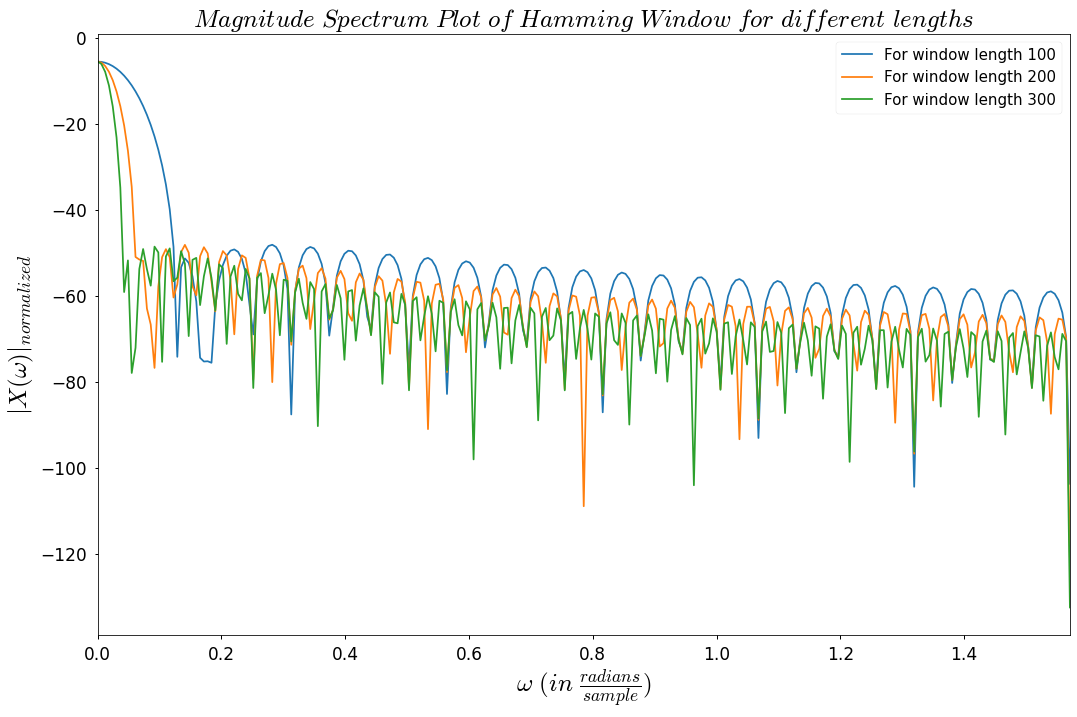

In [63]:
N = 1024
fig2, axs2 = plt.subplots(1, figsize=(15,10))
def plot_signal_2(x, y, label =None, title=None, xaxis_label=None, yaxis_label=None, row=None):  
    axs2.plot(x, y, label = label )
    axs2.set_xlim(0, np.pi/2)
    axs2.set_title(title, fontsize = 25)
    axs2.set_xlabel(xaxis_label, fontsize = 25)
    axs2.set_ylabel(yaxis_label, fontsize = 25)
    axs2.tick_params(axis="both", labelsize = 17)
    axs2.legend(loc = 'upper right', fontsize = 15)
    fig2.tight_layout()

def spec(L, N, title=None, wrange=None, label=None):
    w=sp.windows.hamming(L)
    k=np.arange(0, N)
    W=fft(w, n=N)
    plot_signal_2(k*2*np.pi/N, 20*np.log10(np.abs(W)/L), label=label, title=title, xaxis_label=r'$\omega\ (in\ \frac{radians}{sample})$', yaxis_label=r'$|X(\omega)|_{normalized}$')
    
l = [100,200,300]
label = ['For window length 100', 'For window length 200', 'For window length 300']
spec(l[0], N, title=(r'$Magnitude Spectrum Plot of Hanning Windows of different lengths$'), label=label[0])
spec(l[1], N, title=(r'$Magnitude Spectrum Plot of Hanning Windows of different lengths$'), label=label[1])
spec(l[2], N, title=(r'$Magnitude\ Spectrum\ Plot\ of\ Hamming\ Window\ for\ different\ lengths$'), label=label[2])

fig2.savefig('fig2.png')

# **Problem** **2**. <br>
Part 1: <br>

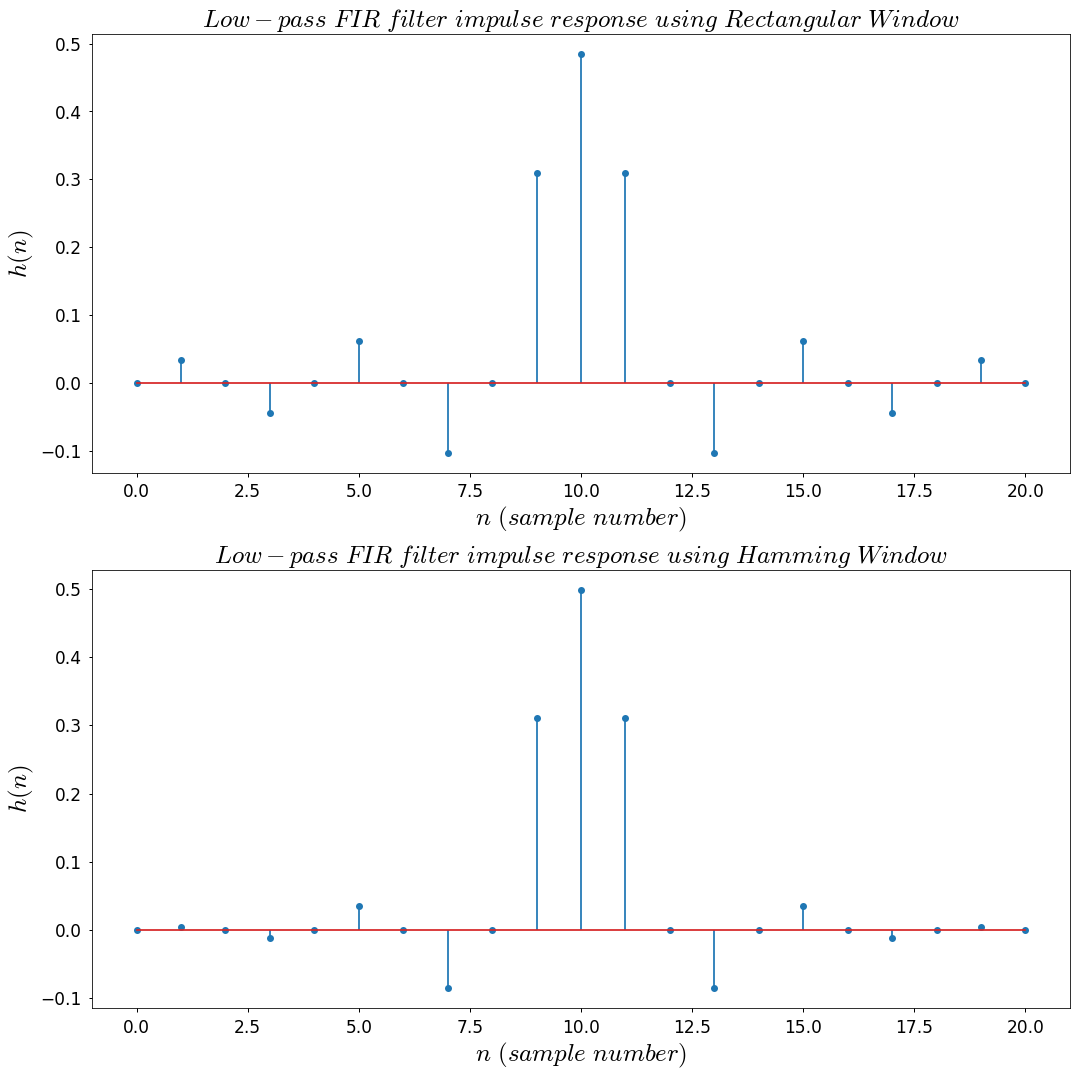

In [10]:
fig3, axs3 = plt.subplots(2, figsize=(15,15))
def plot_stem(x, y, label =None, title=None, xaxis_label=None, yaxis_label=None, row=None):  
    axs3[row].stem(x, y, label = label , use_line_collection =True)
    axs3[row].set_title(title, fontsize = 25)
    axs3[row].set_xlabel(xaxis_label, fontsize = 25)
    axs3[row].set_ylabel(yaxis_label, fontsize = 25)
    axs3[row].tick_params(axis="both", labelsize = 17)
    fig3.tight_layout()

M = 21
w_c=np.pi/(a+1)
f_c=w_c/(2*np.pi)
ir_rec=sp.firwin(M, 2*f_c, window='boxcar')
ir_hamm=sp.firwin(M, 2*f_c, window='hamming')
n=np.arange(0, M)
plot_stem(n, ir_rec, title=r'$Low-pass\ FIR\ filter\ impulse\ response\ using\ Rectangular\ Window$', xaxis_label=r'$n\ (sample\ number)$', yaxis_label=r'$h(n)$', row=0)
plot_stem(n, ir_hamm, title=r'$Low-pass\ FIR\ filter\ impulse\ response\ using\ Hamming\ Window$', xaxis_label=r'$n\ (sample\ number)$', yaxis_label=r'$h(n)$', row=1)
fig3.savefig('fig3.png')

Part 2:

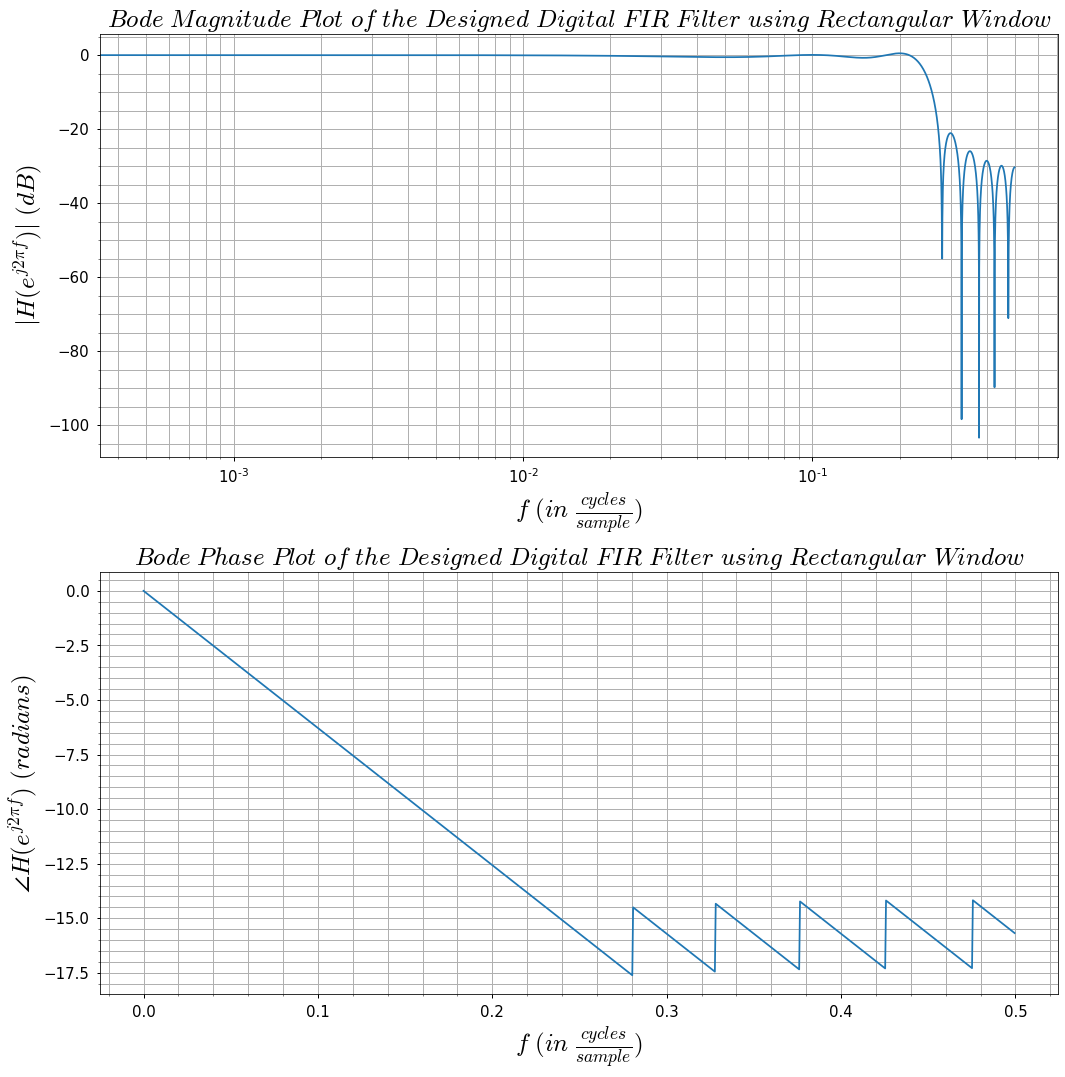

In [11]:
num_1=ir_rec
denom_1=np.zeros(M)
denom_1[0]=1
freq1, mag1 = sp.freqz(num_1, denom_1, 1024)
title = ['$Bode\ Magnitude\ Plot\ of\ the\ Designed\ Digital\ FIR\ Filter\ using\ Rectangular\ Window$', '$Bode\ Phase\ Plot\ of\ the\ Designed\ Digital\ FIR\ Filter\ using\ Rectangular\ Window$']
fig4, axs4 = plt.subplots(2, figsize=(15,15))
def plot_bode_1(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs4[row].grid(b=True, which='major', linestyle='-')
    axs4[row].grid(b=True, which='minor', linestyle='-')
    axs4[row].minorticks_on()
    if row == 0:
      axs4[row].semilogx(x/(2*np.pi), 20*np.log10(np.abs(y)))
    else:
      axs4[row].plot(x/(2*np.pi), np.unwrap(np.angle(y))) 

    axs4[row].set_title(title[row], fontsize = 25)
    axs4[row].set_xlabel(xaxis_label, fontsize = 25)
    axs4[row].set_ylabel(yaxis_label, fontsize = 25)
    axs4[row].tick_params(axis="both", labelsize = 15)
    fig4.tight_layout()
    
plot_bode_1(freq1, mag1, xaxis_label=r'$f\ (in\ \frac{cycles}{sample})$', yaxis_label=r'$|H(e^{j2\pi f})|\ (dB)$', row=0)
plot_bode_1(freq1, mag1, xaxis_label=r'$f\ (in\ \frac{cycles}{sample})$', yaxis_label=r'$\angle H(e^{j2\pi f})\ (radians)$', row=1)
fig4.savefig('fig4.png')



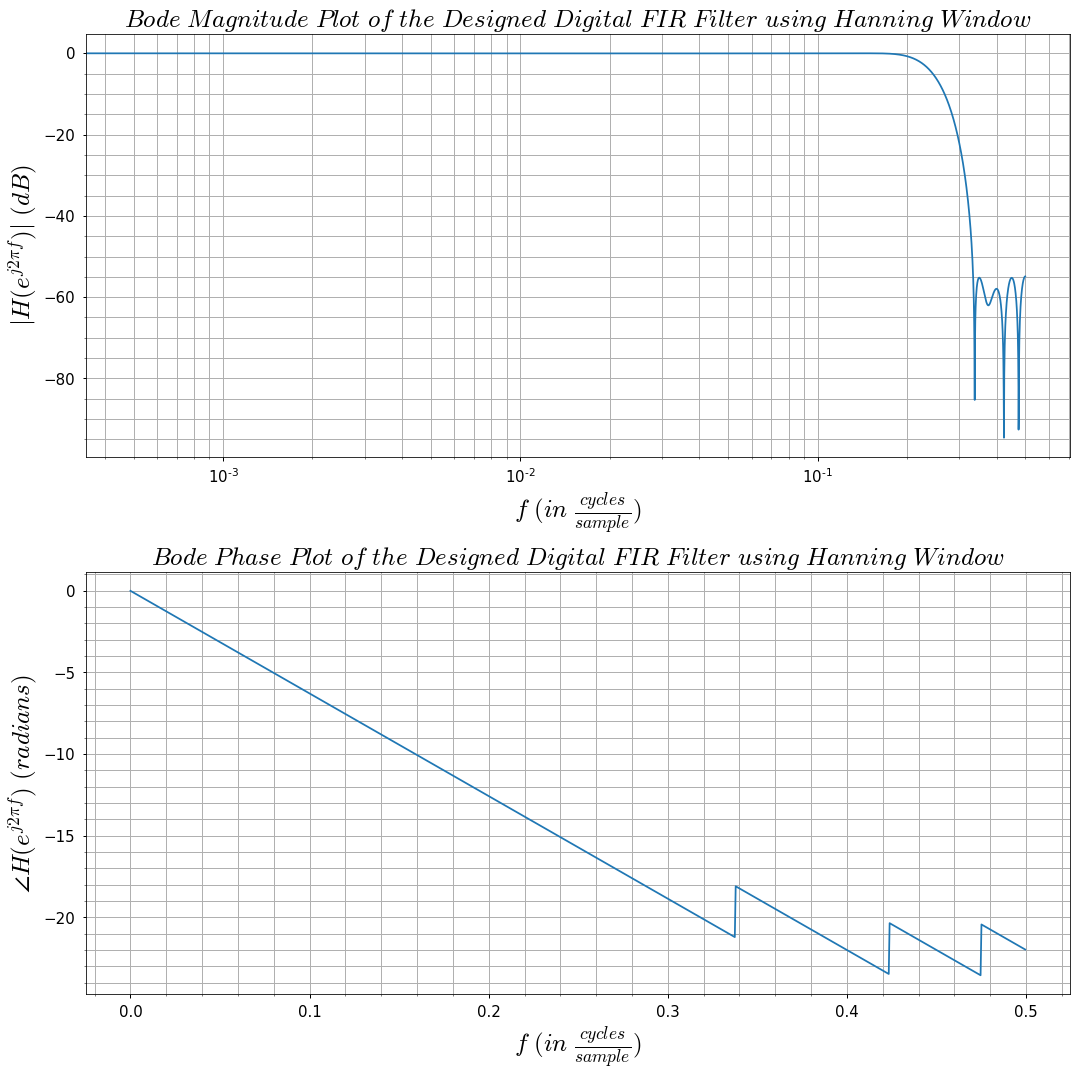

In [12]:
num_2=ir_hamm
denom_2=np.zeros(M)
denom_2[0]=1
freq2, mag2 = sp.freqz(num_2, denom_2, 1024)
title = ['$Bode\ Magnitude\ Plot\ of\ the\ Designed\ Digital\ FIR\ Filter\ using\ Hanning\ Window$', '$Bode\ Phase\ Plot\ of\ the\ Designed\ Digital\ FIR\ Filter\ using\ Hanning\ Window$']
fig5, axs5 = plt.subplots(2, figsize=(15,15))
def plot_bode_2(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs5[row].grid(b=True, which='major', linestyle='-')
    axs5[row].grid(b=True, which='minor', linestyle='-')
    axs5[row].minorticks_on()
    if row == 0:
      axs5[row].semilogx(x/(2*np.pi), 20*np.log10(np.abs(y)))
    else:
      axs5[row].plot(x/(2*np.pi), np.unwrap(np.angle(y))) 

    axs5[row].set_title(title[row], fontsize = 25)
    axs5[row].set_xlabel(xaxis_label, fontsize = 25)
    axs5[row].set_ylabel(yaxis_label, fontsize = 25)
    axs5[row].tick_params(axis="both", labelsize = 15)
    fig5.tight_layout()
    
plot_bode_2(freq2, mag2, xaxis_label=r'$f\ (in\ \frac{cycles}{sample})$', yaxis_label=r'$|H(e^{j2\pi f})|\ (dB)$', row=0)
plot_bode_2(freq2, mag2, xaxis_label=r'$f\ (in\ \frac{cycles}{sample})$', yaxis_label=r'$\angle H(e^{j2\pi f})\ (radians)$', row=1)
fig5.savefig('fig5.png')



# **Problem** **3**. <br>
Part 1:

Sampling rate of instrument : 11025Hz
Size of instrument signal: (36250,)


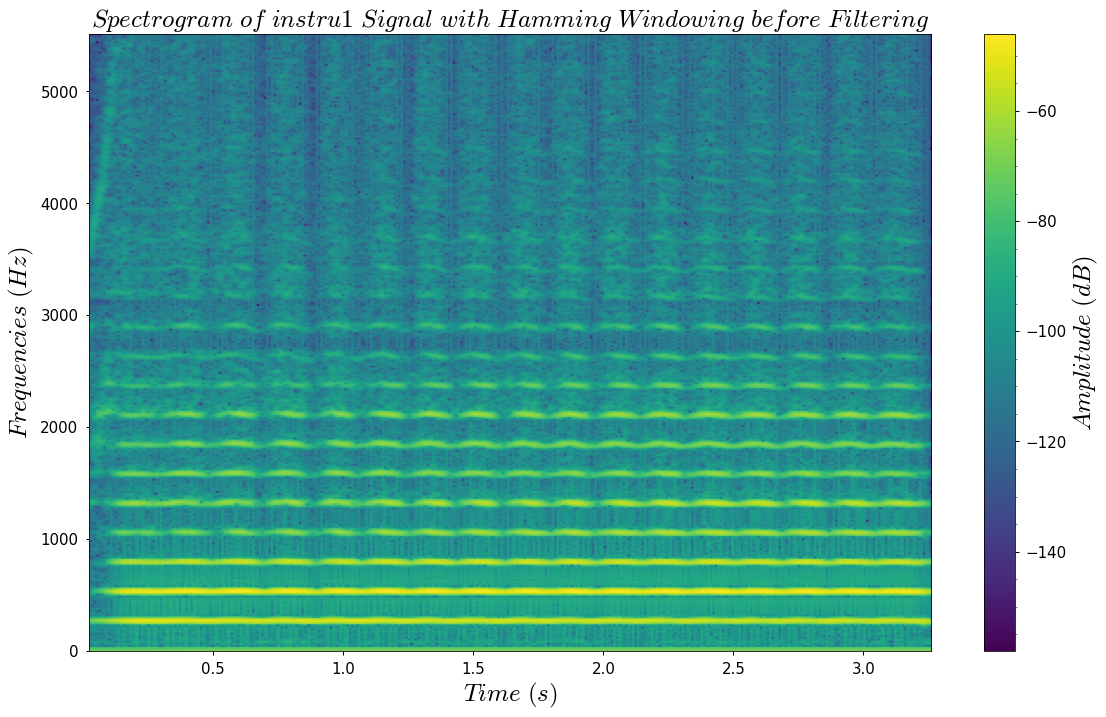

In [4]:
Fs1, track= wavfile.read('instru1.wav')
track = track/32767.0
print('Sampling rate of instrument : {}Hz'.format(Fs1))
print('Size of instrument signal: {}'.format(track.shape))
Nosi = 600
fig6, ax1 = plt.subplots(figsize=(16,10))
def specgram2d(y, N, Fs, window=None, ax=None, title=None):
  ax = plt.axes()
  ax.set_title(title, loc='center', wrap=True, fontsize = 25)
  if window=='hamming':
    ws=sp.windows.hamming(N)
  elif window=='hanning':
    ws=sp.windows.hanning(N)
  elif window=='blackman':
    ws=sp.windows.blackman(N)
  else:
    ws=sp.windows.boxcar(N)
  spec, freqs, t, im = ax.specgram(y, NFFT=N, Fs=Fs, window=ws, noverlap=500, scale='dB')
  ax.set_xlabel(r'$Time\ (s)$', fontsize = 25)
  ax.set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 25)
  cbar = plt.colorbar(im, ax=ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 25)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 15)
  ax.tick_params(axis="both", labelsize = 15)
  fig6.tight_layout()

specgram2d(track, Nosi, Fs1, ax=ax1, window='hamming', title = r'$Spectrogram\ of\ instru1\ Signal\ with\ Hamming\ Windowing\ before\ Filtering$')
fig6.savefig('fig6.png')


display(Audio(data=track, rate=Fs1))

In [5]:
def find_ff(track, frequency):
  TRACK = fft(track)
  max_val = np.max(np.abs(TRACK))
  TRACK = TRACK/max_val
  for i in range (len(TRACK)):
    if (np.abs(TRACK[i])<=0.1):
      TRACK[i]=0;
    elif (i==0):
      TRACK[i]=0 

  TRACK_peaks = sp.find_peaks(np.abs(TRACK), prominence=0.6)[0] 
  fundamental_frequency = (TRACK_peaks[0]/len(TRACK)) *frequency
  return fundamental_frequency

ff_1 = find_ff(track, Fs1)

print('The Fundamental frequency of the instru1 audio signal before filtering: {} Hz'.format(ff_1))

The Fundamental frequency of the instru1 audio signal before filtering: 262.4710344827586 Hz


Part 2: <br>
From the above spectrogram we notice that the fundamental frequency (the first major peak after DC value) lies around the 230Hz range. Now in order to design a Butterwirth filter capable of extracting/filtering out the fundamental peak we choose the specifications of the filter to be as follows: passband
edges at 200Hz and300Hz, stopband edges at 100Hz and 400Hz, passband ripple of -3 dB, and an minimum stopband attenuation of 40 dB. 

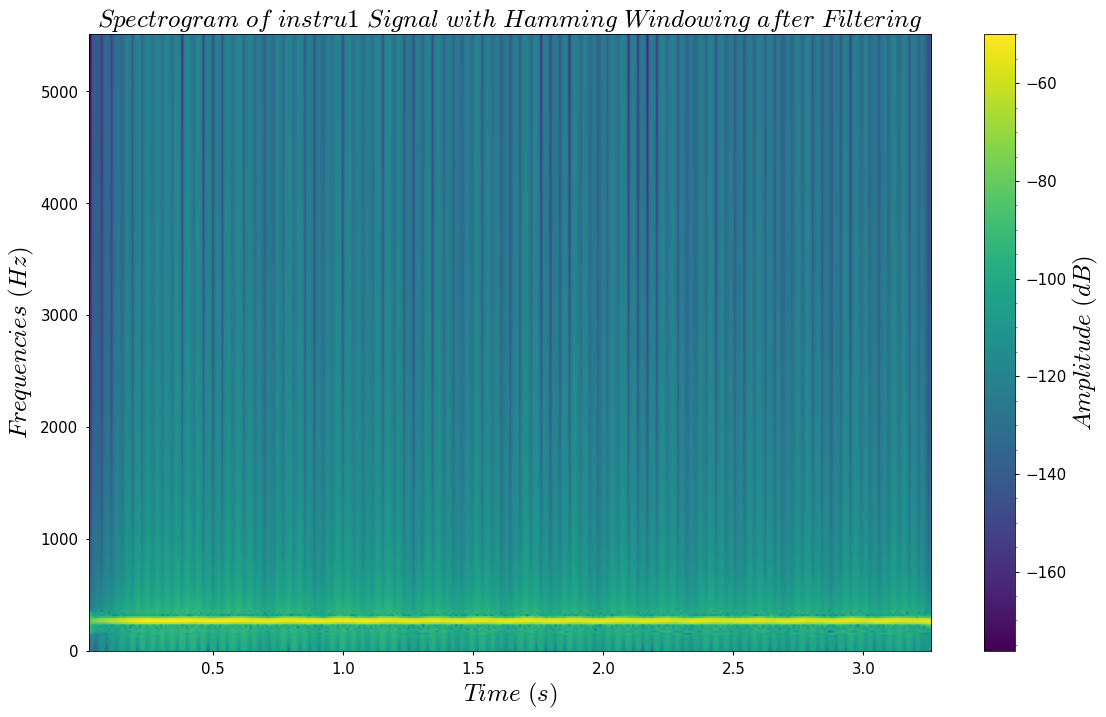

In [7]:
Fl=200
Fu=300
Fs_1=100
Fs_2=400
fl=Fl/Fs1
fu=Fu/Fs1
fs1=Fs_1/Fs1
fs2=Fs_2/Fs1
fc1=0.5*(fs1+fl)
fc2=0.5*(fs2+fu)
if np.ceil(5.5/(fl-fs1))%2:
    M=np.ceil(5.5/(fl-fs1))
else:
    M=np.ceil(5.5/(fl-fs1))+1
num=sp.firwin(int(M), [2*fc1, 2*fc2], window='hanning', pass_zero=False)
denum=np.zeros(int(M))
denum[0]=1
y=sp.lfilter(num, denum, track)

Nosi = 600
fig7, ax2 = plt.subplots(figsize=(16,10))
def specgram2d(y, N, Fs, window=None, ax=None, title=None):
  ax = plt.axes()
  ax.set_title(title, loc='center', wrap=True, fontsize = 25)
  if window=='hamming':
    ws=sp.windows.hamming(N)
  elif window=='hanning':
    ws=sp.windows.hanning(N)
  elif window=='blackman':
    ws=sp.windows.blackman(N)
  else:
    ws=sp.windows.boxcar(N)
  spec, freqs, t, im = ax.specgram(y, NFFT=N, Fs=Fs, window=ws, noverlap=500, scale='dB')
  ax.set_xlabel(r'$Time\ (s)$', fontsize = 25)
  ax.set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 25)
  cbar = plt.colorbar(im, ax=ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 25)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 15)
  ax.tick_params(axis="both", labelsize = 15)
  fig7.tight_layout()


specgram2d(y, Nosi, Fs1, ax=ax2, window='hamming', title = r'$Spectrogram\ of\ instru1\ Signal\ with\ Hamming\ Windowing\ after\ Filtering$')
fig7.savefig('fig7.png')
wavfile.write('instru1_filtered.wav', Fs1, (32767*y).astype(np.int16))
Fs2, track2= wavfile.read('instru1_filtered.wav')
display(Audio(data=track2, rate=Fs2))